<a href="https://colab.research.google.com/github/sefabckn/ChurnAnalysisOfTelecom/blob/project/ChurnAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('Telco-Customer-Churn.csv')
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df.head(5)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


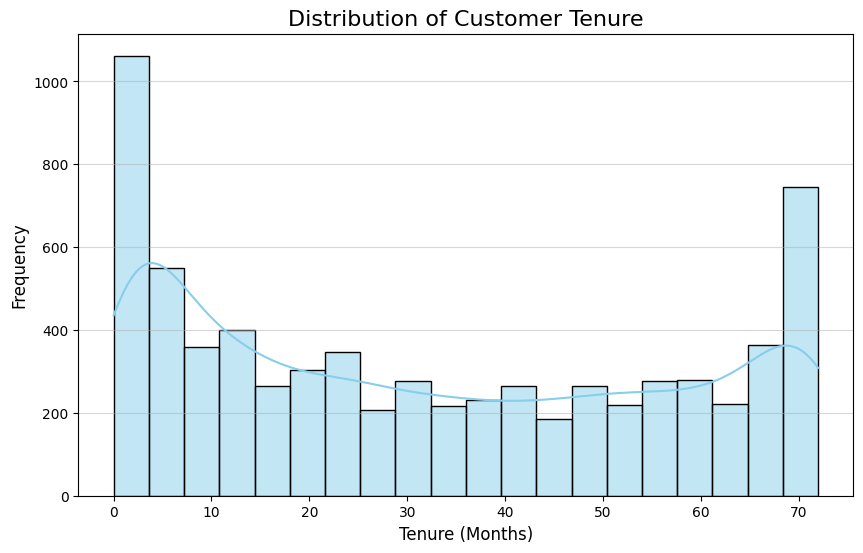

<ipython-input-4-bf34aded05c3>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')


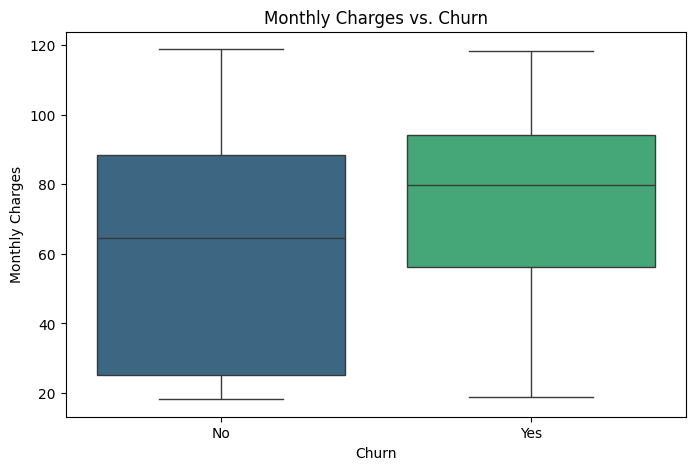

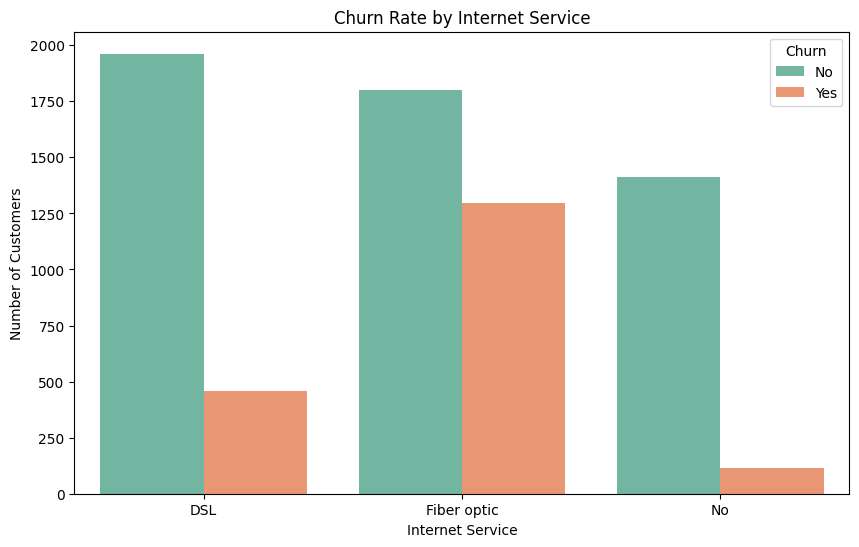

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Telco-Customer-Churn.csv')

plt.figure(figsize=(10, 6))  # Adjust figure size
sns.histplot(df['tenure'], bins=20, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Customer Tenure', fontsize=16)  # Add a title
plt.xlabel('Tenure (Months)', fontsize=12)  # Label the x-axis
plt.ylabel('Frequency', fontsize=12)  # Label the y-axis
plt.grid(axis='y', alpha=0.5)  # Add a subtle grid
plt.xticks(fontsize=10)  # Adjust x-axis tick label size
plt.yticks(fontsize=10)  # Adjust y-axis tick label size
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')
plt.title('Monthly Charges vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Monthly Charges')
plt.show()


plt.figure(figsize=(10, 6))
sns.countplot(x='InternetService', hue='Churn', data=df, palette='Set2')
plt.title('Churn Rate by Internet Service')
plt.xlabel('Internet Service')
plt.ylabel('Number of Customers')
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.dtypes

,0
customerID,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object
OnlineSecurity,object


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
df["TotalCharges"] = df["TotalCharges"].fillna(0)
print(df['TotalCharges'].isnull().sum())

0


In [ ]:
# Calculate the mean, median, and mode for numerical columns
for column in df.select_dtypes(include=['number']):
  print(f"\nColumn: {column}")
  print(f"Mean: {df[column].mean()}")
  print(f"Median: {df[column].median()}")
  print(f"Mode: {df[column].mode()[0]}")



Column: SeniorCitizen
Mean: 0.1621468124378816
Median: 0.0
Mode: 0

Column: tenure
Mean: 32.37114865824223
Median: 29.0
Mode: 1

Column: MonthlyCharges
Mean: 64.76169246059918
Median: 70.35
Mode: 20.05


In [ ]:
# Calculate the variance for numerical columns
for column in df.select_dtypes(include=['number']):
  print(f"\nColumn: {column}")
  print(f"Variance: {df[column].var()}")



Column: SeniorCitizen
Variance: 0.135874515790402

Column: tenure
Variance: 603.1681081237256

Column: MonthlyCharges
Variance: 905.4109343405128

Column: TotalCharges
Variance: 5138357.167812723


In [ ]:

# Find the range for the 'TotalCharges' column
total_charges_range = df['TotalCharges'].max() - df['TotalCharges'].min()
print(f"Range of TotalCharges: {total_charges_range}")

montly_charges_range = df['MonthlyCharges'].max() - df['MonthlyCharges'].min()
print(f"Range of MonthlyCharges:{montly_charges_range}")

tenure_range = df['tenure'].max() - df['tenure'].min()
print(f"Range of tenure: {tenure_range}")


Range of TotalCharges: 8684.8
Range of MonthlyCharges:100.5
Range of tenure: 72


In [ ]:
skewness_TotalCharges=  df['TotalCharges'].skew()
print(f"Skewness of TotalCharges: {skewness_TotalCharges}")

skewness_MontlyCharges=  df['MonthlyCharges'].skew()
print(f"Skewness of MonthlyCharges: {skewness_MontlyCharges}")

skewness_tenure=  df['tenure'].skew()
print(f"Skewness of tenure: {skewness_tenure}")



Skewness of TotalCharges: 0.963234654832277
Skewness of MonthlyCharges: -0.22052443394398033
Skewness of tenure: 0.2395397495619829


In [ ]:
kurtosis_TotalCharges=  df['TotalCharges'].kurtosis()
print(f"Kurtosis of TotalCharges: {kurtosis_TotalCharges}")

kurtosis_MontlyCharges=  df['MonthlyCharges'].kurtosis()
print(f"Kurtosis of MonthlyCharges: {kurtosis_MontlyCharges}")

kurtosis_Tenure = df['tenure'].kurtosis()
print(f"Kurtosis of Tenure: {kurtosis_Tenure}")

Kurtosis of TotalCharges: -0.22857980712373127
Kurtosis of MonthlyCharges: -1.2572596945495056
Kurtosis of Tenure: -1.387371635971685


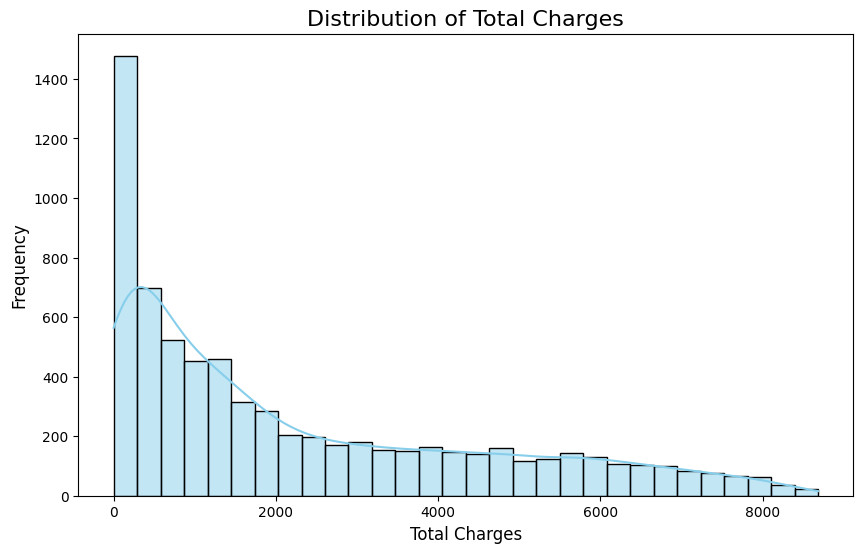

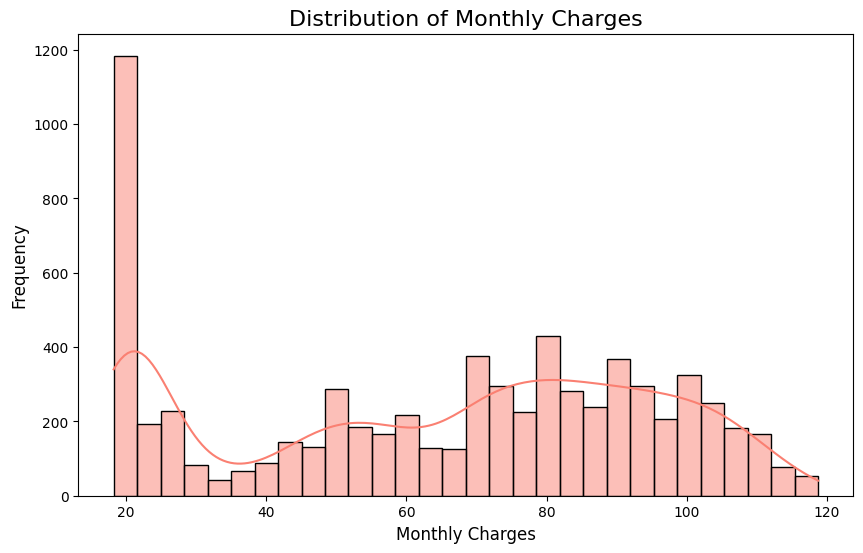

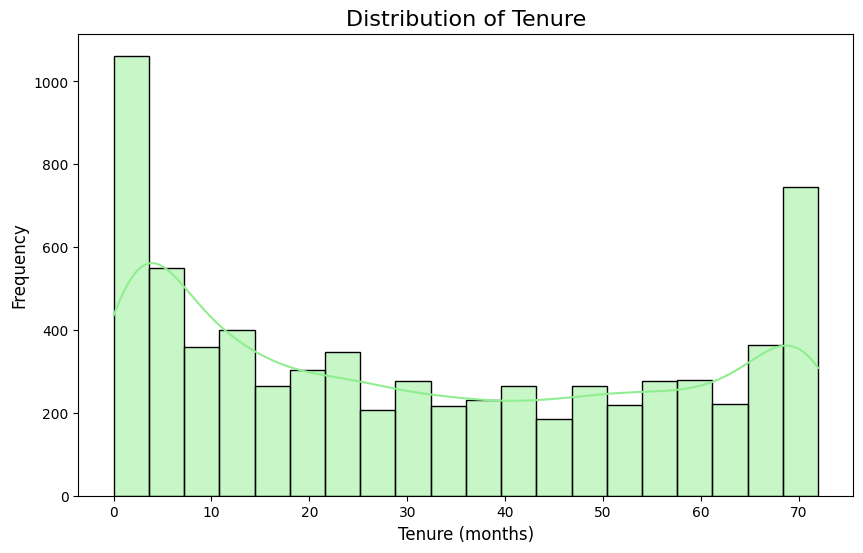

In [ ]:

# Histogram for TotalCharges
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalCharges'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Total Charges', fontsize=16)
plt.xlabel('Total Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


# Histogram for MonthlyCharges
plt.figure(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Monthly Charges', fontsize=16)
plt.xlabel('Monthly Charges', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Histogram for Tenure
plt.figure(figsize=(10, 6))
sns.histplot(df['tenure'], bins=20, kde=True, color='lightgreen')
plt.title('Distribution of Tenure', fontsize=16)
plt.xlabel('Tenure (months)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()



<ipython-input-14-c229ce8288aa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

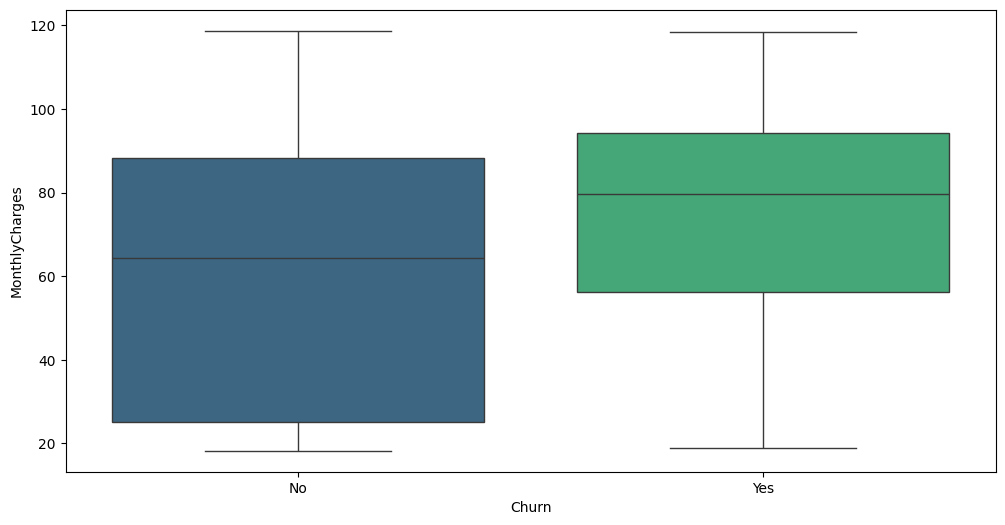

In [ ]:

# Box Plots -  Summarize the distribution of a numerical variable, indicating median, quartiles, and outliers.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, palette='viridis')
plt

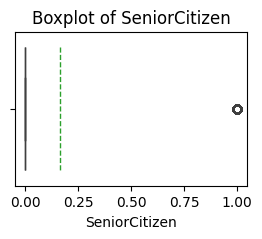

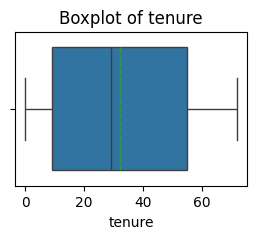

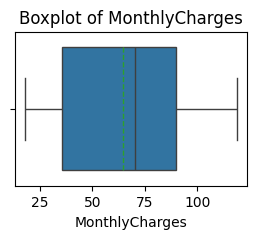

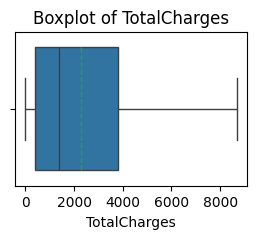

In [ ]:
# Select only columns with numerical data
numerical_cols = df.select_dtypes(include=['number']).columns

# box plots for all numerical columns
for col in numerical_cols:
  plt.figure(figsize=(3, 2))
  sns.boxplot(x=df[col], showmeans=1, meanline=1, orientation="vertical", whis=1.5)
  plt.title(f'Boxplot of {col}')
  plt.show()


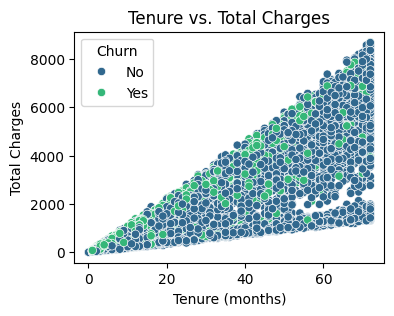

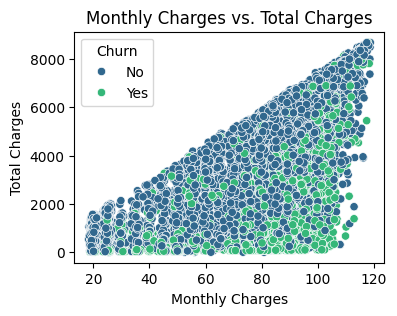

In [ ]:

# Scatter Plots - Explore relationships between pairs of variables, useful for spotting correlations, trends, and outliers.
plt.figure(figsize=(4, 3))
sns.scatterplot(x='tenure', y='TotalCharges', data=df, hue='Churn', palette='viridis')
plt.title('Tenure vs. Total Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Total Charges')
plt.show()

plt.figure(figsize=(4, 3))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', data=df, hue='Churn', palette='viridis')
plt.title('Monthly Charges vs. Total Charges')
plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.show()



<ipython-input-42-0644de3f3956>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PaymentMethod', data=df, palette='viridis')


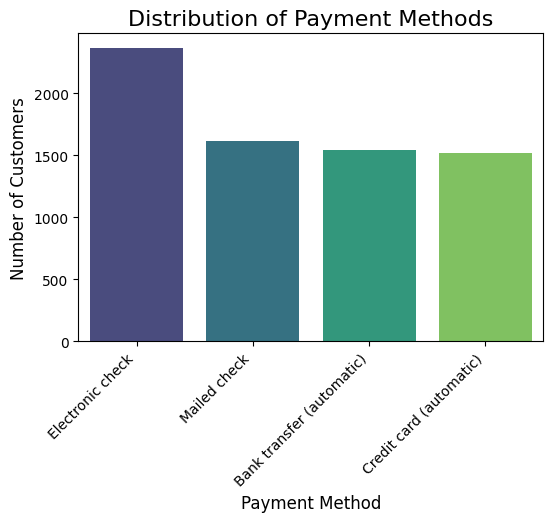

<ipython-input-42-0644de3f3956>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Contract', data=df, palette='Set2')


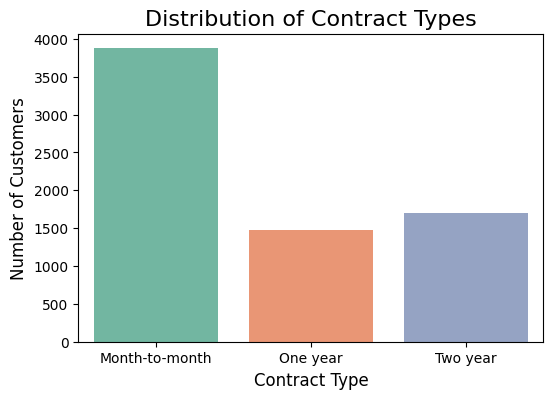

<ipython-input-42-0644de3f3956>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set3')


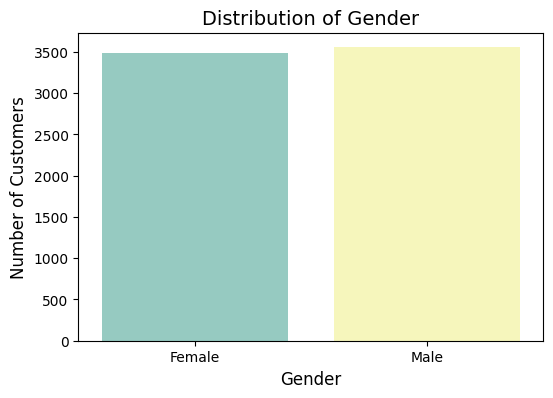

<ipython-input-42-0644de3f3956>:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Partner', data=df, palette='Set3')


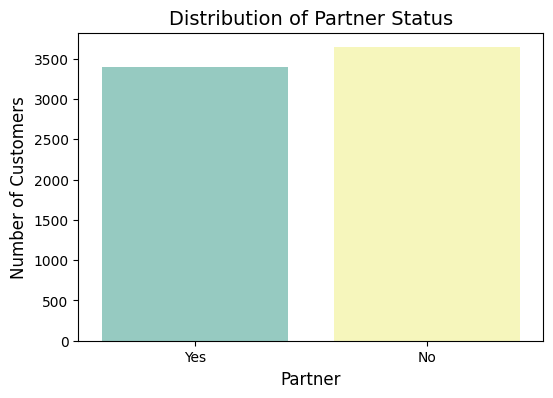

<ipython-input-42-0644de3f3956>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Dependents', data=df, palette='Set3')


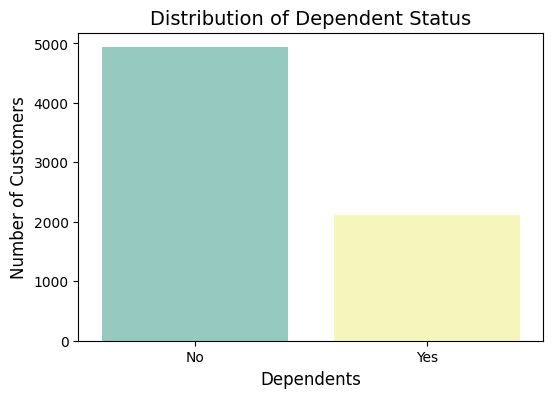

<ipython-input-42-0644de3f3956>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='PhoneService', data=df, palette='Set3')


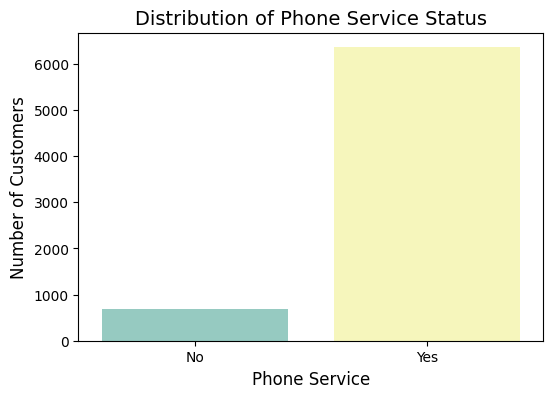

<ipython-input-42-0644de3f3956>:58: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='MultipleLines', data=df, palette='Set3')


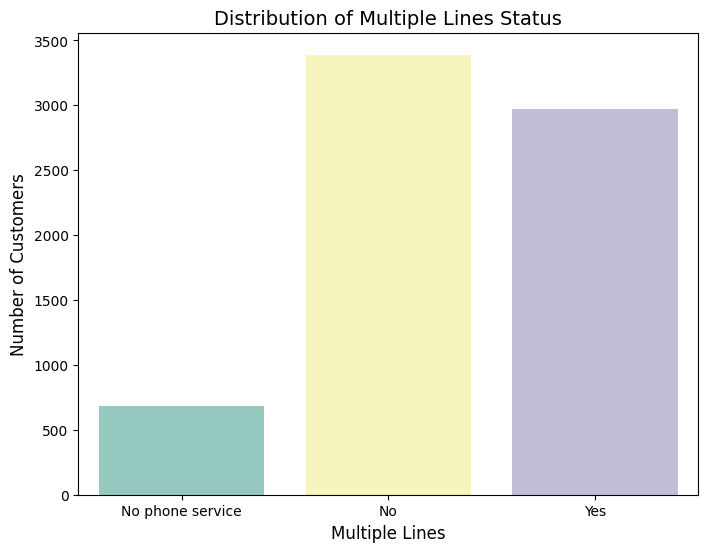

In [ ]:
# prompt: Bar Charts -  Useful for displaying the frequencies of categorical data., Smallerfigsizes

# Bar Chart for 'PaymentMethod'
plt.figure(figsize=(6, 4))  # Adjust figure size as needed
sns.countplot(x='PaymentMethod', data=df, palette='viridis')
plt.title('Distribution of Payment Methods', fontsize=16)
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


# Bar Chart for 'Contract'
plt.figure(figsize=(6, 4))
sns.countplot(x='Contract', data=df, palette='Set2')
plt.title('Distribution of Contract Types', fontsize=16)
plt.xlabel('Contract Type', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


# Bar Chart for 'gender'
plt.figure(figsize=(6, 4))
sns.countplot(x='gender', data=df, palette='Set3')
plt.title('Distribution of Gender', fontsize=14)
plt.xlabel('Gender', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

# Bar Chart for 'Partner'
plt.figure(figsize=(6, 4))
sns.countplot(x='Partner', data=df, palette='Set3')
plt.title('Distribution of Partner Status', fontsize=14)
plt.xlabel('Partner', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()

# Bar Chart for 'Dependents'
plt.figure(figsize=(6, 4))
sns.countplot(x='Dependents', data=df, palette='Set3')
plt.title('Distribution of Dependent Status', fontsize=14)
plt.xlabel('Dependents', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


# Bar Chart for 'PhoneService'
plt.figure(figsize=(6, 4))
sns.countplot(x='PhoneService', data=df, palette='Set3')
plt.title('Distribution of Phone Service Status', fontsize=14)
plt.xlabel('Phone Service', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()


# Bar Chart for 'MultipleLines'
plt.figure(figsize=(8, 6))
sns.countplot(x='MultipleLines', data=df, palette='Set3')
plt.title('Distribution of Multiple Lines Status', fontsize=14)
plt.xlabel('Multiple Lines', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.show()



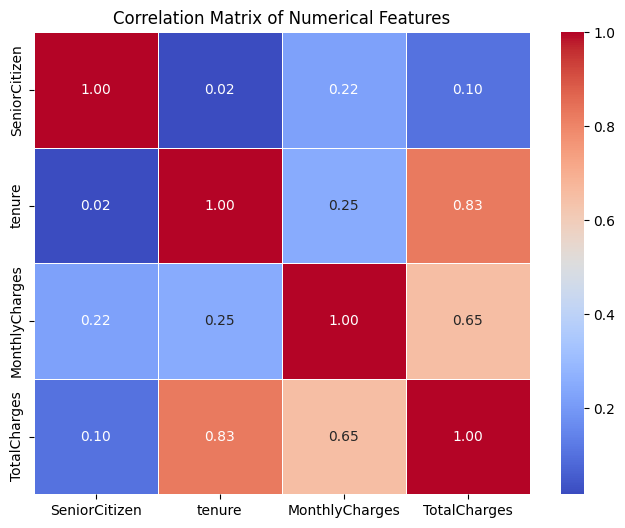

In [ ]:
# Correlation Matrix Heatmap
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

correlation_matrix = numerical_df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Classification

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Drop customerID (not useful)
df.drop("customerID", axis=1, inplace=True)

# Handle missing or invalid values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)  # Remove rows with missing values

In [ ]:
# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [ ]:
# Define features and target
X = df.drop("Churn", axis=1)
y = df["Churn"]

In [ ]:
# Split into train, validation, and test sets (70/15/15)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.1765, random_state=42, stratify=y_temp)  # 0.1765 * 0.85 ≈ 0.15

In [ ]:
# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict on validation set
y_val_pred = model.predict(X_val)

In [ ]:
# Evaluate
print("Validation Metrics:")
print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Precision: {precision_score(y_val, y_val_pred):.4f}")
print(f"Recall (Sensitivity): {recall_score(y_val, y_val_pred):.4f}")
print(f"F1 Score: {f1_score(y_val, y_val_pred):.4f}")
print("\nConfusion Matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification Report:\n", classification_report(y_val, y_val_pred))

# Final test evaluation
y_test_pred = model.predict(X_test)
print("\nTest Set Final Evaluation:")
print(f"Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")

Validation Metrics:
Accuracy: 0.7867
Precision: 0.6503
Recall (Sensitivity): 0.4250
F1 Score: 0.5140

Confusion Matrix:
 [[711  64]
 [161 119]]

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.92      0.86       775
           1       0.65      0.42      0.51       280

    accuracy                           0.79      1055
   macro avg       0.73      0.67      0.69      1055
weighted avg       0.77      0.79      0.77      1055


Test Set Final Evaluation:
Test Accuracy: 0.7848


## Regression

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Load the data (if not loaded yet)
df = pd.read_csv("Telco-Customer-Churn.csv")

# Drop customerID (not useful)
df.drop("customerID", axis=1, inplace=True)

# Handle missing or invalid values
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors='coerce')
df.dropna(inplace=True)  # Remove rows with missing values

# Encode categorical variables
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Define features and target for regression
X = df.drop("MonthlyCharges", axis=1)
y = df["MonthlyCharges"]

# Feature scaling (optional but useful for some models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train, validation, and test sets (64/16/20)
X_temp, X_test, y_temp, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.20, random_state=42)

# Train the regression model
regressor = RandomForestRegressor(n_estimators=100, random_state=42)
regressor.fit(X_train, y_train)

# Predict on validation set
y_val_pred = regressor.predict(X_val)

# Evaluate on validation set
mae = mean_absolute_error(y_val, y_val_pred)
mse = mean_squared_error(y_val, y_val_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_val, y_val_pred)

print("Validation Set Evaluation:")
print(f"MAE:  {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R²:   {r2:.4f}")

# Final test evaluation
y_test_pred = regressor.predict(X_test)
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("\nTest Set Final Evaluation:")
print(f"Test MAE:  {mae_test:.2f}")
print(f"Test RMSE: {rmse_test:.2f}")
print(f"Test R²:   {r2_test:.4f}")


Validation Set Evaluation:
MAE:  1.03
RMSE: 1.47
R²:   0.9976

Test Set Final Evaluation:
Test MAE:  1.01
Test RMSE: 1.46
Test R²:   0.9976


# Task
i need Bar chart: Churn by contract type



Here is all the data you need:
"Telco-Customer-Churn.csv"

## Data loading

### Subtask:
Load the Telco customer churn data into a pandas DataFrame.


**Reasoning**:
Load the Telco customer churn data into a pandas DataFrame and display the first 5 rows.



In [ ]:
import pandas as pd

try:
    df = pd.read_csv('Telco-Customer-Churn.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'Telco-Customer-Churn.csv' not found. Please ensure the file is in the correct location.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Data exploration

### Subtask:
Explore the loaded data to understand its structure, identify key columns, and check for missing values.


**Reasoning**:
I need to explore the data, check data types, and look for missing values in the 'Churn' and 'Contract' columns, as well as the entire dataset.



In [ ]:
# Display the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Display data types of each column
print("\nData Types of Columns:\n", df.dtypes)

# Identify and examine 'Churn' and 'Contract' columns
print("\nInformation about 'Churn' column:")
print("Data Type:", df['Churn'].dtype)
print("Unique Values:", df['Churn'].unique())
print("Missing Values:", df['Churn'].isnull().sum())

print("\nInformation about 'Contract' column:")
print("Data Type:", df['Contract'].dtype)
print("Unique Values:", df['Contract'].unique())
print("Missing Values:", df['Contract'].isnull().sum())

# Check for missing values in the entire DataFrame
print("\nMissing values in the entire DataFrame:\n", df.isnull().sum())

Shape of the DataFrame: (7043, 21)

Data Types of Columns:
 customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

Information about 'Churn' column:
Data Type: object
Unique Values: ['No' 'Yes']
Missing Values: 0

Information about 'Contract' column:
Data Type: object
Unique Values: ['Month-to-month' 'One year' 'Two year']
Missing Values: 0

Missing values in the entire DataFrame:
 customerID          0
gender              0
SeniorCitizen       0
P

## Data wrangling

### Subtask:
Calculate churn rates for each contract type.


**Reasoning**:
Calculate the churn rate for each contract type and store it in a new DataFrame.



In [ ]:
churn_rates = df.groupby('Contract')['Churn'].value_counts(normalize=True).unstack()
churn_rates = churn_rates[['Yes']]
churn_rates = churn_rates.rename(columns={'Yes': 'Churn Rate'})
display(churn_rates)

Churn,Churn Rate
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


## Data visualization

### Subtask:
Visualize churn rates by contract type using a bar chart.


**Reasoning**:
Generate the bar chart based on the churn_rates dataframe.



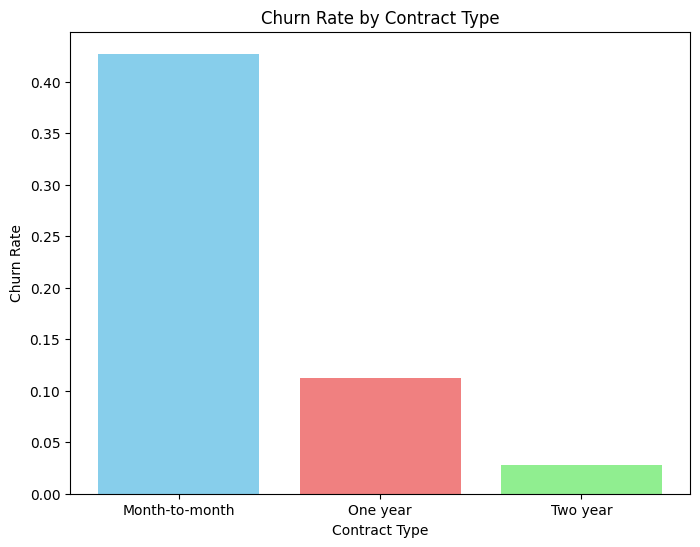

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.bar(churn_rates.index, churn_rates['Churn Rate'], color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Contract Type')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Contract Type')
plt.show()

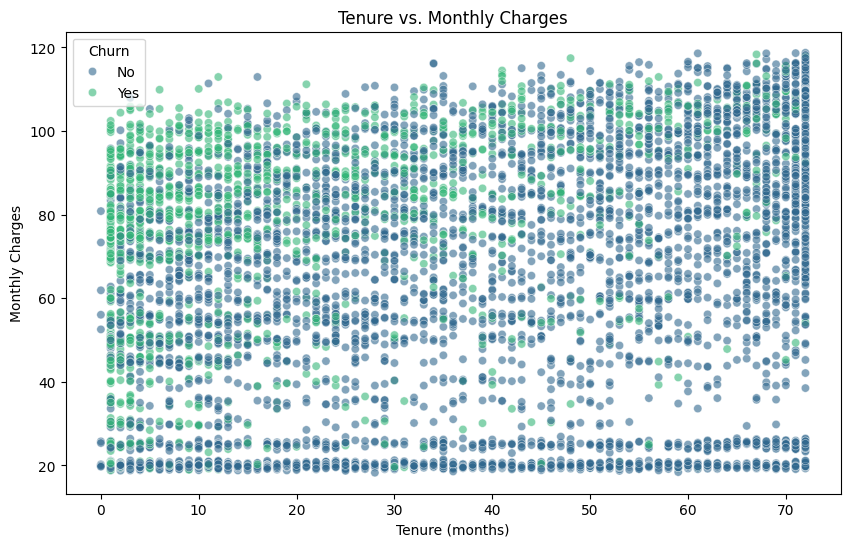

In [ ]:
# prompt: i need scatterplot to show tenure vs monthly charges
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tenure', y='MonthlyCharges', data=df, hue='Churn', palette='viridis', alpha=0.6)
plt.title('Tenure vs. Monthly Charges')
plt.xlabel('Tenure (months)')
plt.ylabel('Monthly Charges')
plt.show()

## Summary:

### Q&A
* **What are the churn rates for each contract type?**
Month-to-month contracts have the highest churn rate (approximately 42.7%), followed by one-year contracts (around 11.3%), and two-year contracts have the lowest churn rate (about 2.8%).

### Data Analysis Key Findings
* **High Churn for Month-to-Month Contracts:** Customers with month-to-month contracts exhibit a significantly higher churn rate (42.7\\%) compared to those with one-year (11.3\\%) or two-year contracts (2.8\\%).
* **Contract Length and Churn:**  There's a clear negative correlation between contract length and churn rate.  Longer contracts lead to lower churn.

### Insights or Next Steps
* **Focus on Month-to-Month Retention:** Retention strategies should prioritize customers with month-to-month contracts due to their high churn rate.
* **Incentivize Longer Contracts:** Explore incentives or offers to encourage customers to switch to longer-term contracts, potentially through discounts or bundled services.


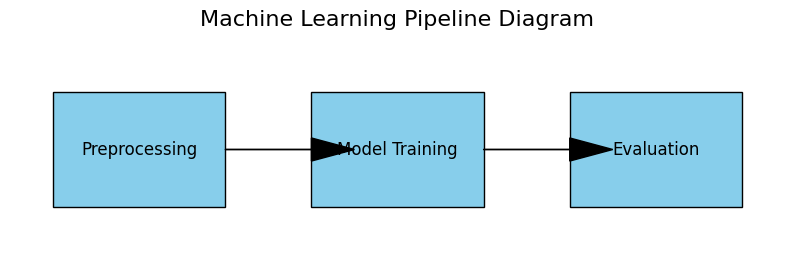

In [ ]:
# prompt: 📊 Visual: ML pipeline diagram (Preprocessing → Model → Evaluation)

# Assuming you want to create a visual representation of the ML pipeline
# This is a conceptual visualization and doesn't execute code related to the pipeline

import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 3))

# Define the stages of the pipeline
stages = ["Preprocessing", "Model Training", "Evaluation"]

# Define coordinates for the boxes
box_width = 0.2
box_height = 0.5
box_spacing = 0.1

# Draw the boxes
for i, stage in enumerate(stages):
    rect = patches.Rectangle((i * (box_width + box_spacing), 0.25), box_width, box_height,
                             linewidth=1, edgecolor='black', facecolor='skyblue', label=stage)
    ax.add_patch(rect)
    # Add text label
    ax.text(i * (box_width + box_spacing) + box_width/2, 0.5, stage,
            ha='center', va='center', fontsize=12)

# Draw arrows between stages
for i in range(len(stages) - 1):
    ax.arrow((i * (box_width + box_spacing)) + box_width, 0.5,
             box_spacing, 0, head_width=0.1, head_length=0.05, fc='black', ec='black')

# Set limits and remove axes
ax.set_xlim(-0.05, (len(stages) * (box_width + box_spacing)) - box_spacing + 0.05)
ax.set_ylim(0, 1)
ax.axis('off')

# Add a title
plt.title("Machine Learning Pipeline Diagram", fontsize=16)

plt.show()

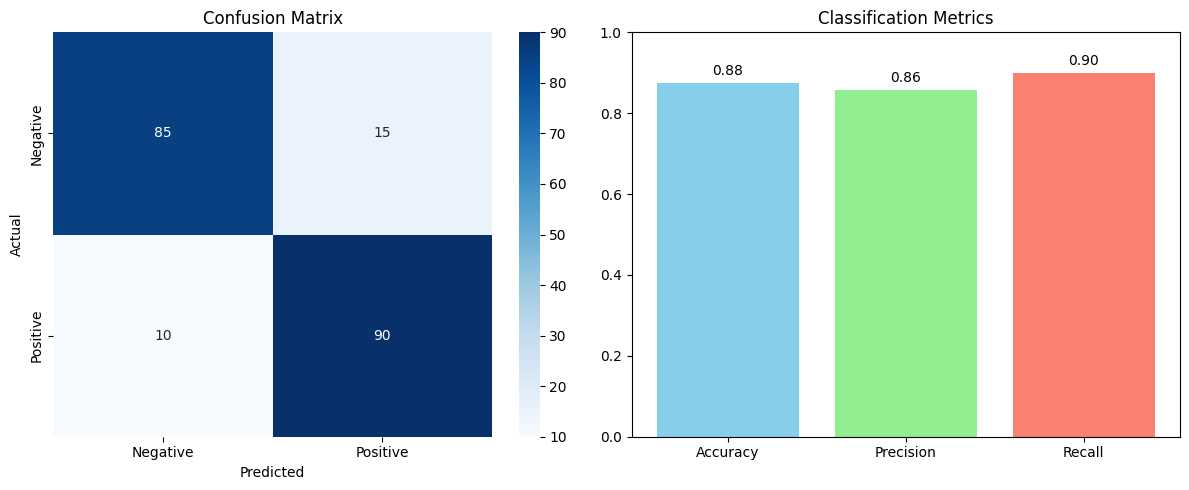

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Sample data for a binary classification confusion matrix
confusion_matrix = np.array([[85, 15],  # True Negative, False Positive
                             [10, 90]]) # False Negative, True Positive

# Metrics calculation
TN, FP, FN, TP = confusion_matrix.ravel()
accuracy = (TP + TN) / (TP + TN + FP + FN)
precision = TP / (TP + FP)
recall = TP / (TP + FN)

# Create figure with subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Confusion matrix heatmap
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')
axes[0].xaxis.set_ticklabels(['Negative', 'Positive'])
axes[0].yaxis.set_ticklabels(['Negative', 'Positive'])

# Bar chart for metrics
metrics = ['Accuracy', 'Precision', 'Recall']
scores = [accuracy, precision, recall]
axes[1].bar(metrics, scores, color=['skyblue', 'lightgreen', 'salmon'])
axes[1].set_ylim(0, 1)
axes[1].set_title('Classification Metrics')
for i, v in enumerate(scores):
    axes[1].text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.tight_layout()
plt.show()
